### Loading and cleaning data

In [3]:
# Load the neccessary library
library(tidyverse)
library(lubridate)
library(readxl)

The data obtained from UK Retail Sales at Office for National Statistics
Total sales and average weekly spending estimates for each retail sector in  Great Britain in £ thousands.

We now have the data for sales in December, traditionally the biggest time of the year for retail sales in the UK
We want to see how sales have trended across the year in different sectors and year-on-year

● How does 2019 compare to 2018?

● How do trends for different sectors compare across 2019?

● How do December sales by sector compare from 2018 to 2019?

In [4]:
# Load the downloaded dataset
total_sales <- read_csv('C:/data/partial_clean.csv')

Parsed with column specification:
cols(
  Date = col_character(),
  all = col_double(),
  all_exc_fuel = col_double(),
  `Predominantly food stores` = col_double(),
  `Non-specialised stores` = col_double(),
  `Textile, clothing and footwear stores` = col_double(),
  `Household goods stores` = col_double(),
  `Other stores` = col_double(),
  `Non-store retailing` = col_double(),
  `Automotive fuel` = col_double()
)



In [7]:
head(total_sales)

Date,all,all_exc_fuel,Predominantly food stores,Non-specialised stores,"Textile, clothing and footwear stores",Household goods stores,Other stores,Non-store retailing,Automotive fuel
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1986 Jan,NA,9415779,3737169,818539,1338872,1307264,1408495,805440,NA
1986 Feb,NA,7279180,3092641,610623,895350,986007,1100483,594076,NA
1986 Mar,NA,9562910,3985521,847202,1257188,1248070,1461740,763189,NA
1986 Apr,NA,7897655,3237317,682160,1103896,1040345,1197085,636852,NA
1986 May,NA,7795677,3200780,680693,1099923,1004700,1190620,618961,NA
1986 Jun,NA,10095583,4108939,891831,1477315,1257535,1557235,802728,NA


In [9]:
# Add day to Date column and convert to correct format
total_sales <- total_sales %>% mutate(Date=str_c(Date, '01'), Date=ymd(Date))

In [10]:
# Select just two recent years of the dataset
two_years <- total_sales %>% filter(Date>='2018-01-01')

### How does sales in 2019 compare to 2018?

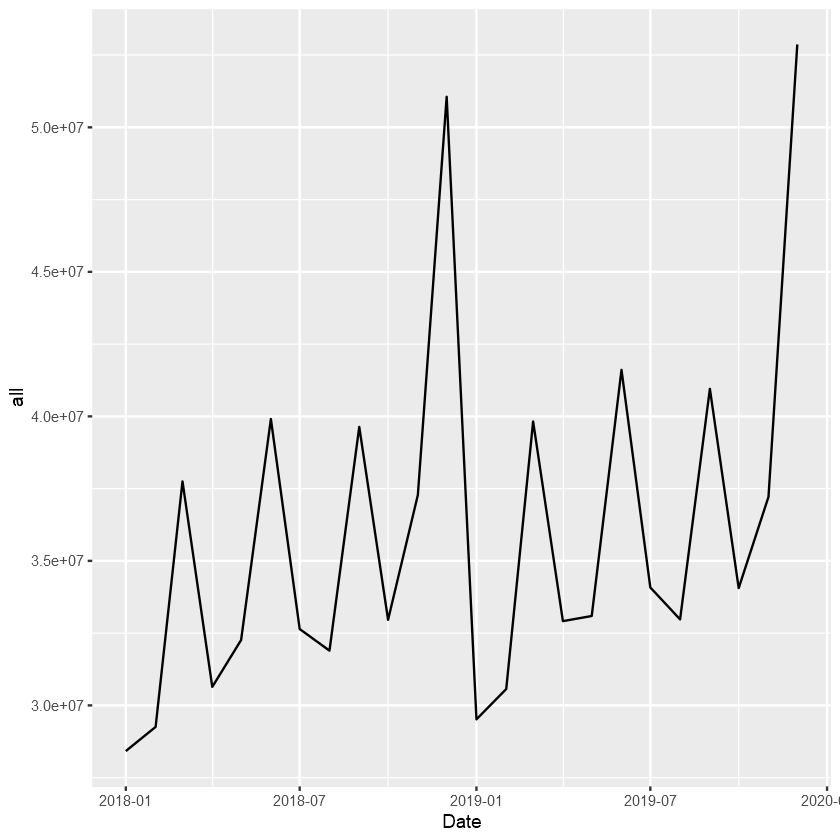

In [12]:
# Let see total sales across time
ggplot(two_years, aes(x=Date, all)) + geom_line()

We might to look at month but with seperate year

In [13]:
# Create two new columns for month and year
two_years <- two_years %>% mutate(month=month(Date), year=year(Date))

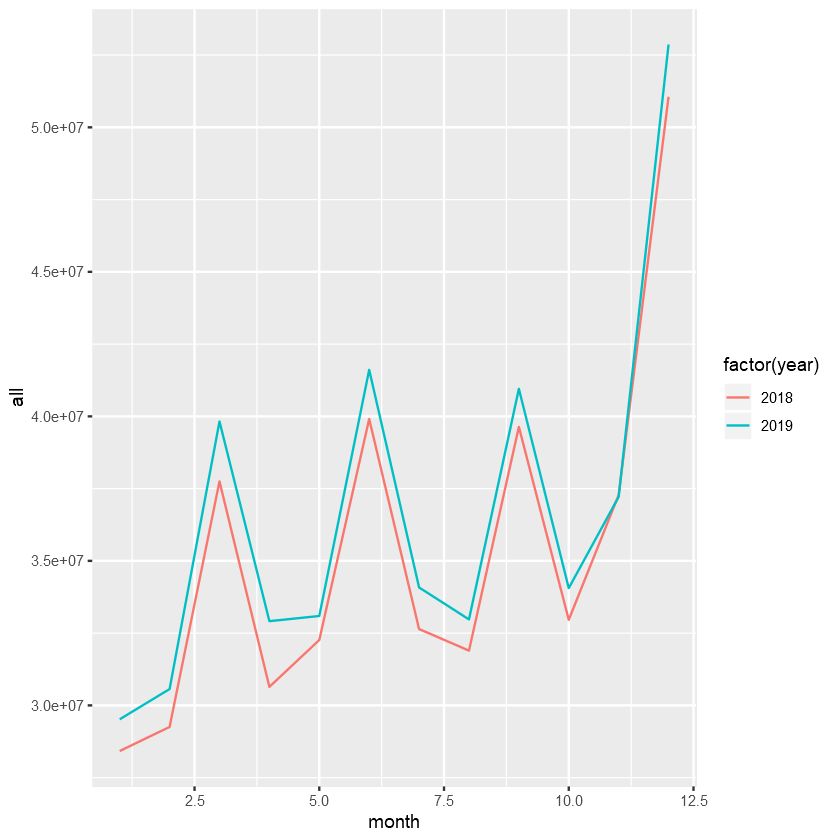

In [16]:
# Let see total sales across month by year
year_plot <- ggplot(two_years, aes(x=month, y=all, color=factor(year))) + geom_line()
year_plot

We can see that retail sales of 2019 is kind of higher than that of 2018 for almost every month

 ### How do trends for different sectors compare across 2019?

Our data currently is in wide format, we need to convert it to long format to compare different sectors

In [26]:
sales_by_category <- total_sales %>%
  filter(Date>='2018-01-01') %>%
  select(-all, -all_exc_fuel) %>%
  gather(key='Sector', value='Sales', -Date)
head(sales_by_category)

Date,Sector,Sales
<date>,<chr>,<dbl>
2018-01-01,Predominantly food stores,11195212
2018-02-01,Predominantly food stores,11854361
2018-03-01,Predominantly food stores,15546605
2018-04-01,Predominantly food stores,11990380
2018-05-01,Predominantly food stores,12806021
2018-06-01,Predominantly food stores,15804616


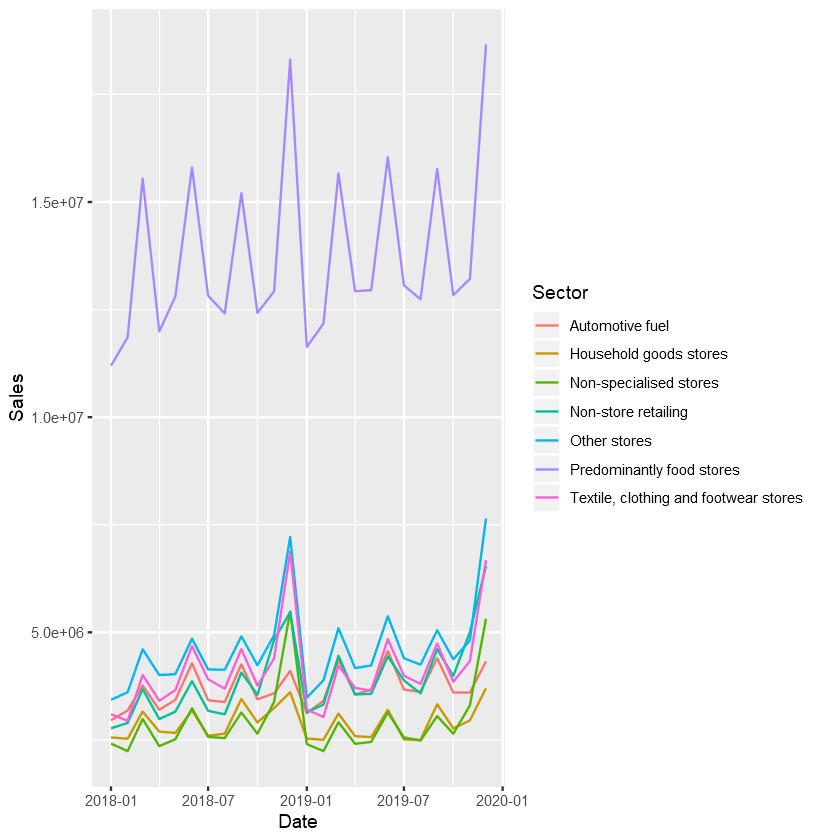

In [21]:
# Now let visualize the sales across sector
ggplot(sales_by_category, aes(Date, Sales, color=Sector)) +
  geom_line()

The data above are shown at raw magnitude which sometimes hard to interpret if the magnitude is much different. Let compare them in the same scale by using percentage

In [27]:
sales_pct <- sales_by_category %>%
  group_by(Sector) %>%
  mutate(Total=sum(Sales), Pct=Sales/Total * 100)

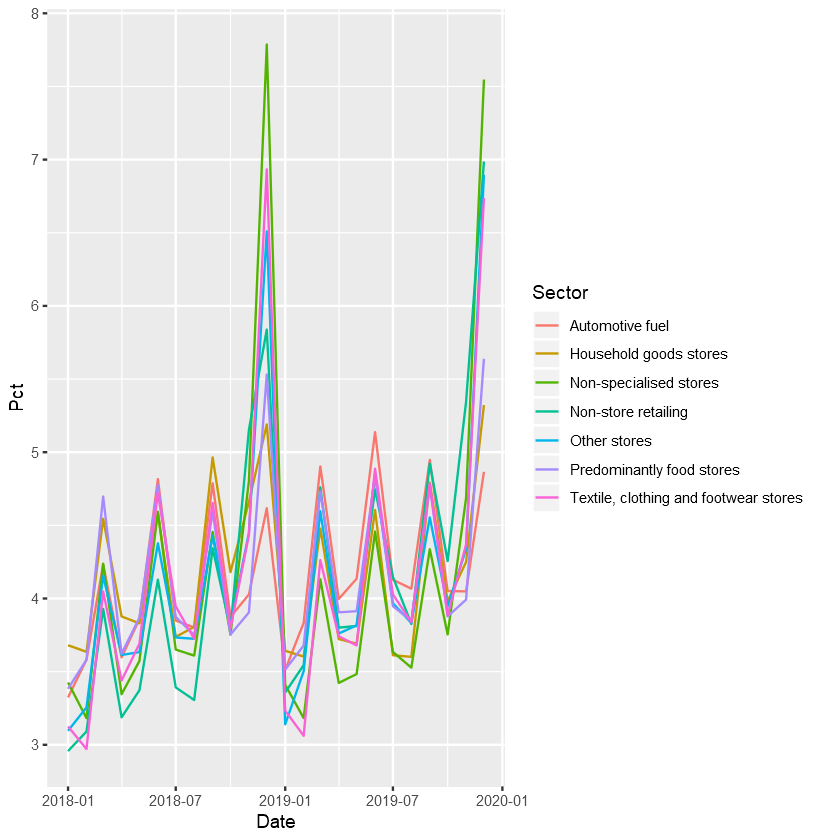

In [29]:
# Now let visualize the sales across sector in percentage
ggplot(sales_pct, aes(Date, Pct, color=Sector)) +
  geom_line()

### How do December sales by sector compare from 2018 to 2019?

In [35]:
# Let filter out December value
december <- sales_pct %>%
  ungroup() %>%
  filter(month(Date)==12) %>%
  mutate(year=year(Date),
        Sector=fct_reorder(Sector, Pct))
glimpse(december)

Observations: 14
Variables: 6
$ Date   <date> 2018-12-01, 2019-12-01, 2018-12-01, 2019-12-01, 2018-12-01,...
$ Sector <fct> "Predominantly food stores", "Predominantly food stores", "N...
$ Sales  <dbl> 18307487, 18661756, 5484288, 5315579, 6870448, 6676594, 3607...
$ Total  <dbl> 330961171, 330961171, 70426860, 70426860, 99086388, 99086388...
$ Pct    <dbl> 5.531612, 5.638654, 7.787211, 7.547659, 6.933796, 6.738155, ...
$ year   <dbl> 2018, 2019, 2018, 2019, 2018, 2019, 2018, 2019, 2018, 2019, ...


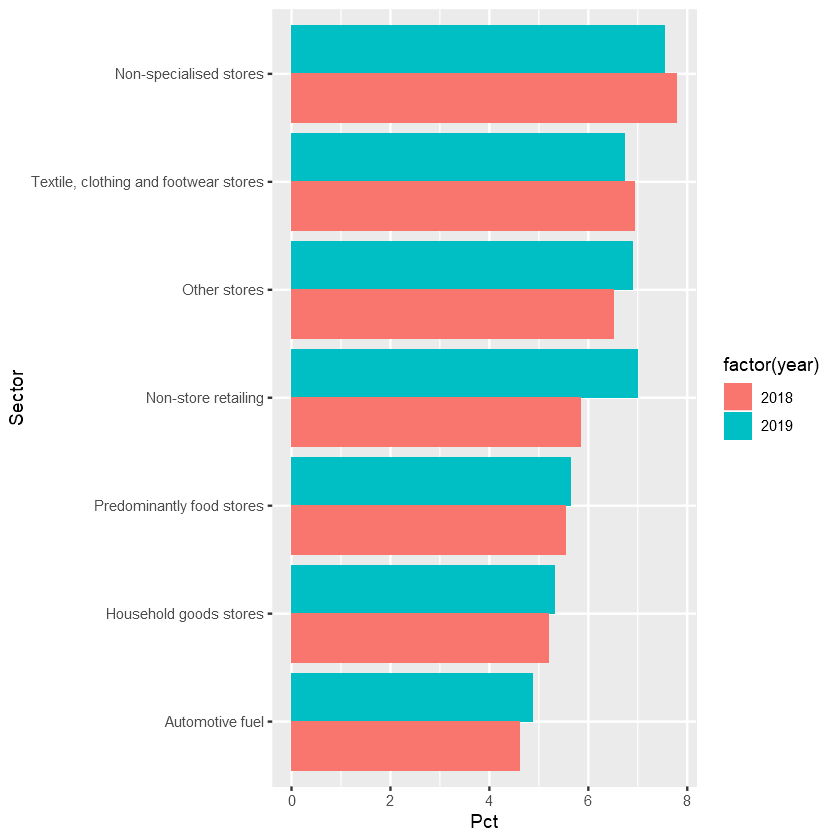

In [39]:
dec_plot <- ggplot(december, aes(Sector, y=Pct, fill=factor(year))) +
  geom_col(position='dodge') +
  coord_flip()

dec_plot

### Embelish the graphs

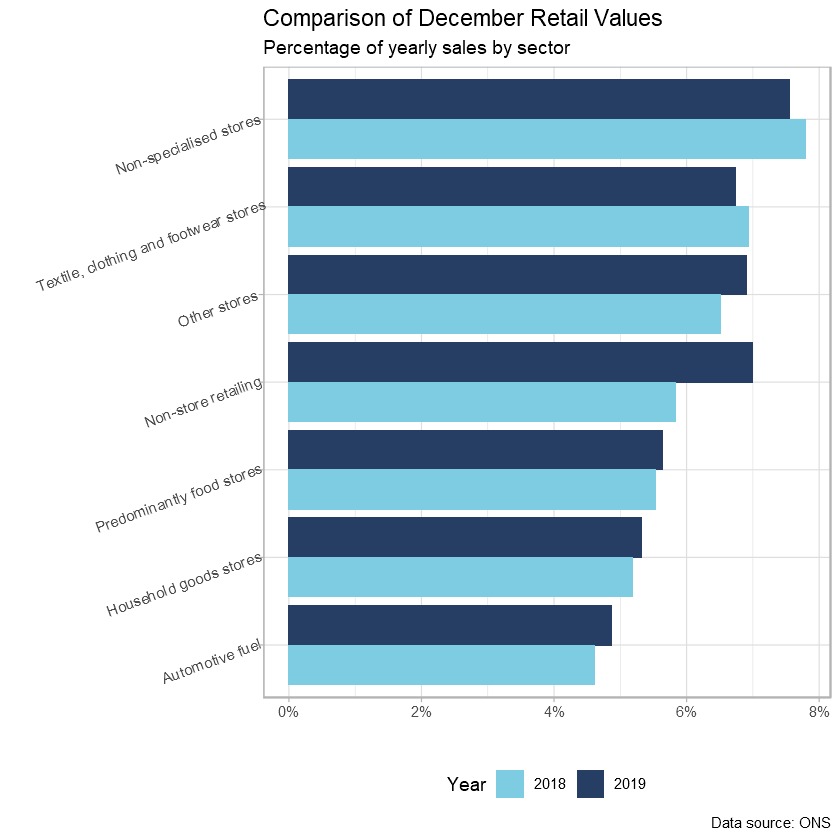

In [40]:
dec_plot +
  labs(title='Comparison of December Retail Values',
       subtitle='Percentage of yearly sales by sector',
       caption='Data source: ONS',
      x='', y='', fill='Year') +
  scale_y_continuous(labels=scales::percent_format(scale=1)) +
  scale_fill_manual(values=c('#7ecce2', '#263e63')) +
  theme_light() +
  theme(legend.position='bottom',
       axis.text.y=element_text(angle=20))

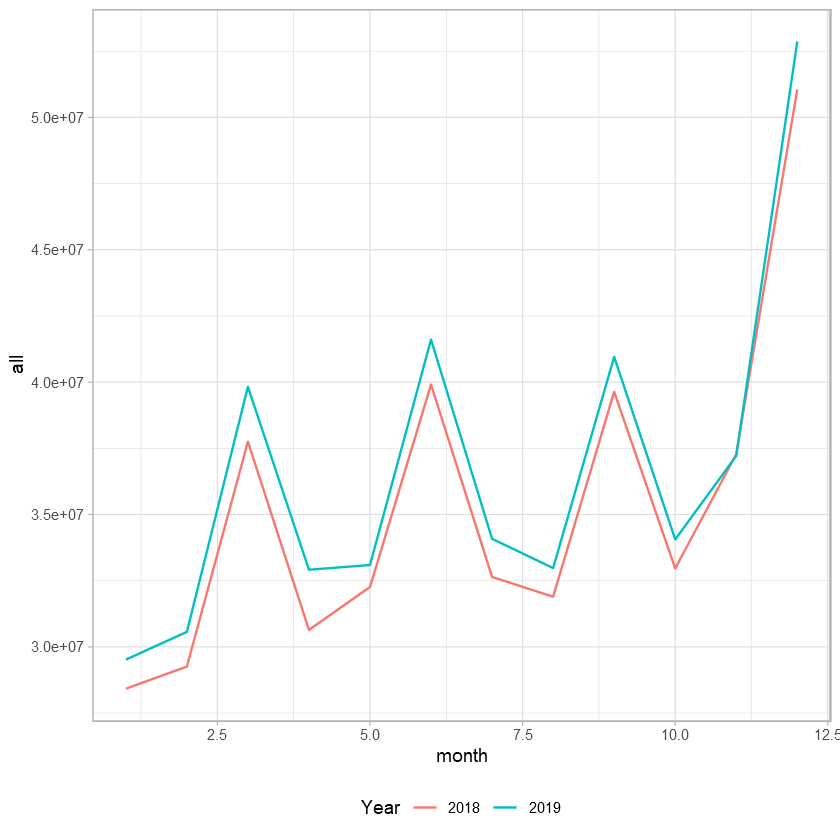

In [42]:
# Let set the theme that apply to the following graphs
theme_set(theme_light())
theme_update(legend.position='bottom')
year_plot + labs(color='Year')

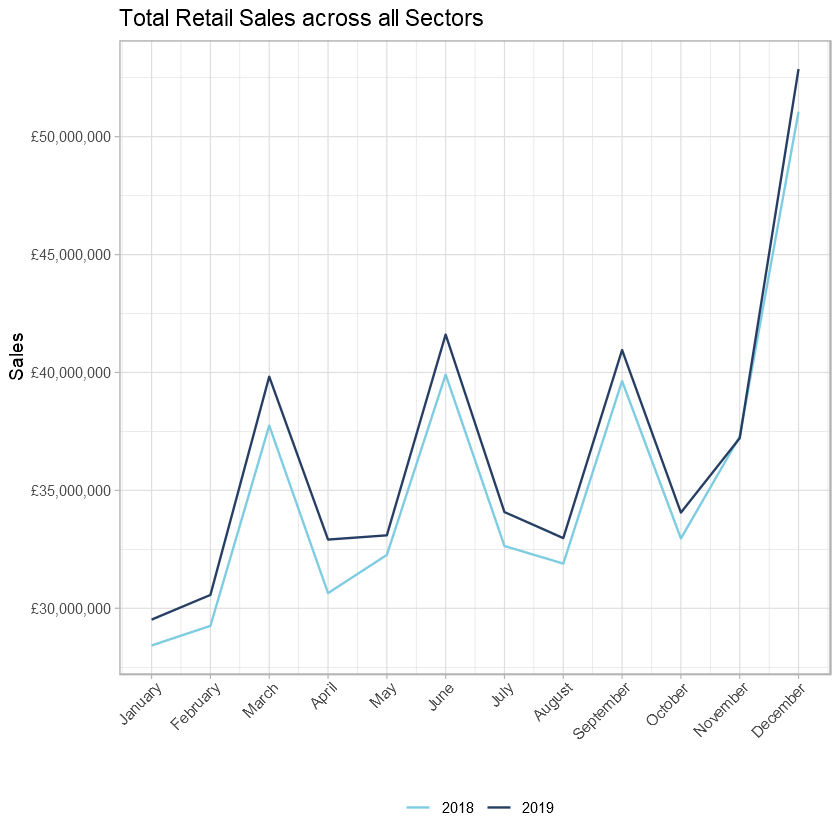

In [44]:
# Let re-render the year_plot
year_format <- year_plot +
  scale_x_continuous(breaks = 1:12, labels = month.name) +   # Change the labels to show category names
  labs(x = "", y = "Sales", 
       title = "Total Retail Sales across all Sectors", 
       color = "") +
  scale_y_continuous(labels = scales::dollar_format(prefix = "£")) +  # Include a currency, default US Dollars can be changed
  scale_color_manual(values = c("#7ecce2", "#263e63")) +    # Make the lines match company colors
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

year_format